In [19]:
#Importing All libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.multiclass import unique_labels
import pandas as pd
from sklearn.metrics import classification_report
import seaborn as sns

In [66]:
#structure of data
iris = load_iris()
print('Dimension of Dataset')
print(iris.data.shape)
labels = ['sepal_length','sepal_width', 
          'petal_length', 'petal_width']
classes= ['Iris Virginica','Iris Versicolor','Iris Setosa']
data = pd.DataFrame(iris.data,
                    index=np.arange(iris.data.shape[0]),
                    columns = labels)

Dimension of Dataset
(150, 4)


In [67]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [68]:
#checking for NUll Values
print('\nAny Null Values')
df.isnull().any()


Any Null Values


sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
species         False
dtype: bool

In [69]:
print('\nData Description\n')
data.describe()


Data Description



,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


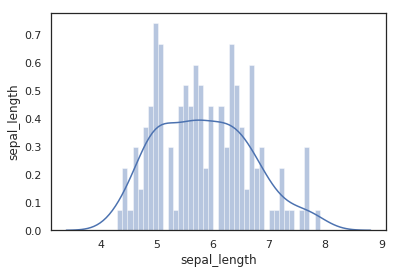

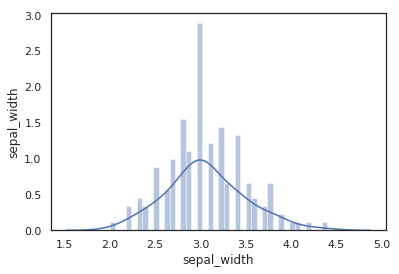

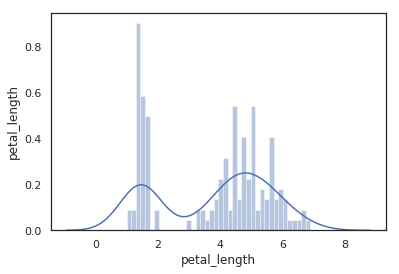

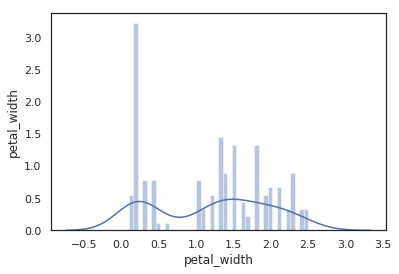

In [70]:
#distribution of data
for i in range(4):
    sns.distplot(iris.data[:,i],kde=True,bins=40)
    plt.ylabel(str(labels[i]))
    plt.xlabel(str(labels[i]))
    plt.show()


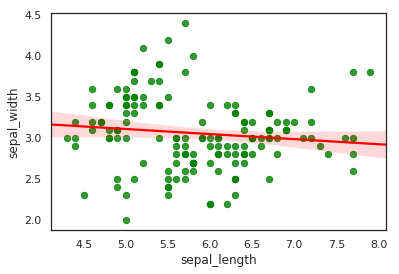

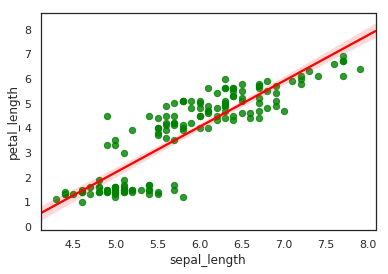

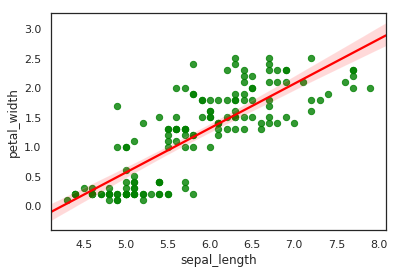

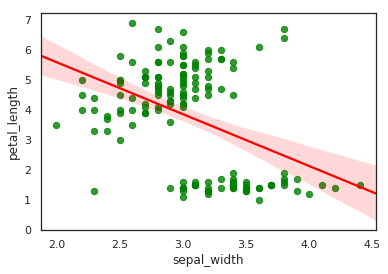

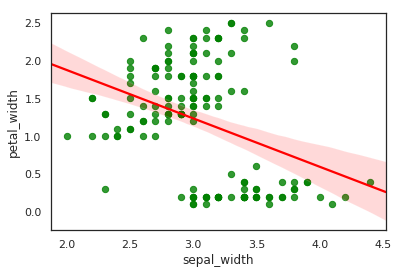

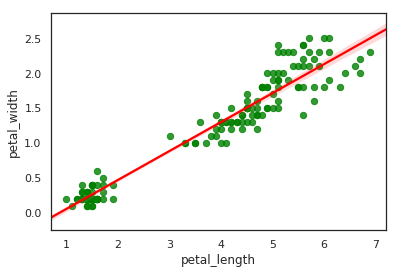

In [71]:
#Regression plot
for i in range(4):
    for j in range(i,4):
        if(i!=j):   
            
            sns.regplot(x=iris.data[:,i], y=iris.data[:,j],
                        scatter_kws={"color":"green","alpha":0.8,"s":40},
                        line_kws={"color": "red"})
            sns.set(style="white",color_codes=True)
            plt.xlabel(str(labels[i]))
            plt.ylabel(str(labels[j]))
            plt.show()

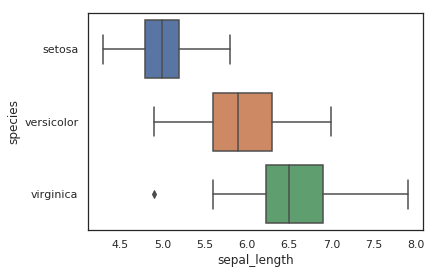

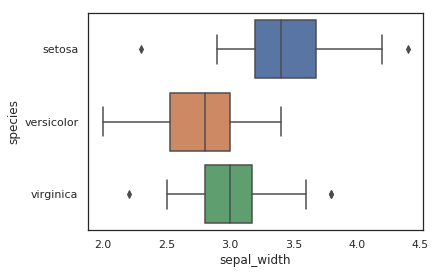

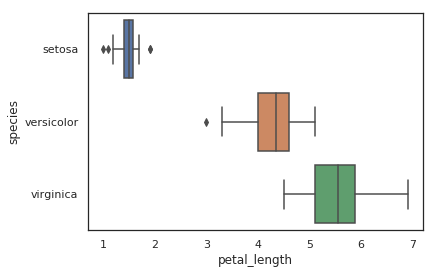

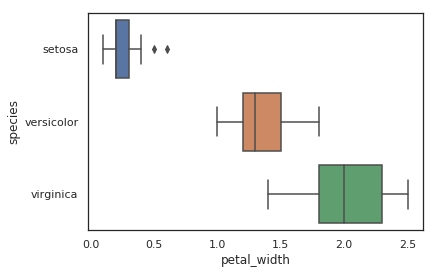

In [75]:
#box plot
df = sns.load_dataset('iris')
for i in range(4):
    sns.boxplot( y=df["species"], x=df[labels[i]] );
    plt.show()


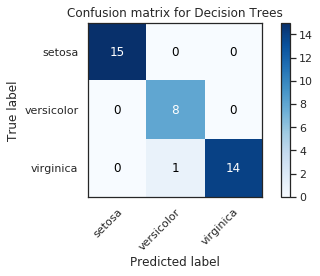

The accuracy of train set for Decision Tree:	100.000 %
The accuracy of the test set for Decision Tree:	97.368 %


Classification Report for Decision tree

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.89      1.00      0.94         8
           2       1.00      0.93      0.97        15

   micro avg       0.97      0.97      0.97        38
   macro avg       0.96      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38


-----------------------------------------------------------------------------------



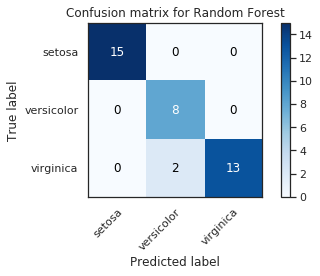


The accuracy of train set Random Forest: 	100.000 %
The accuracy of the test set Random Forest: 	94.737 %
Classification Report for Random Forest

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.80      1.00      0.89         8
           2       1.00      0.87      0.93        15

   micro avg       0.95      0.95      0.95        38
   macro avg       0.93      0.96      0.94        38
weighted avg       0.96      0.95      0.95        38



In [81]:

class_names = iris.target_names

#training data

X_train, X_test, y_train, y_test = train_test_split(iris.data,
                                                    iris.target,
                                                    random_state = 47)

DT = DecisionTreeClassifier().fit(X_train, y_train)
RF = RandomForestClassifier().fit(X_train, y_train)


DT_pred = DT.predict(X_test)
RF_pred = RF.predict(X_test)

#function for confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes,normalize=False,
                          title=None,cmap=plt.cm.Blues):
   
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, DT_pred)]
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot confusion matrix for Decision tree
plot_confusion_matrix(y_test, DT_pred, classes=class_names,
                      title='Confusion matrix for Decision Trees')
plt.show()

print('The accuracy of train set for Decision Tree:\t{:.3f} %' 
      .format(DT.score(X_train, y_train)*100))
print('The accuracy of the test set for Decision Tree:\t{:.3f} %\n\n' 
      .format(DT.score(X_test, y_test)*100))
print('Classification Report for Decision tree\n')
print (classification_report(y_test,DT_pred))
print('\n-----------------------------------------------------------------------------------\n')


# Plot confusion matrix for Random Forest
plot_confusion_matrix(y_test, RF_pred, classes=class_names,
                      title='Confusion matrix for Random Forest')
plt.show()
print('\nThe accuracy of train set Random Forest: \t{:.3f} %' 
      .format(RF.score(X_train, y_train)*100))
print('The accuracy of the test set Random Forest: \t{:.3f} %' 
      .format(RF.score(X_test, y_test)*100))
print('Classification Report for Random Forest\n')
print (classification_report(y_test,RF_pred))
